<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,47.585408,-0.212840,57.372568,58.300680,-0.928112
1,0.0,1.0,37.809635,36.534569,84.344204,58.147484,26.196719
2,0.0,2.0,26.907893,-10.931835,25.976057,57.976643,-32.000586
3,0.0,3.0,28.737091,2.109031,40.846122,58.005308,-17.159187
4,0.0,4.0,92.268482,-91.897042,10.371440,59.000908,-48.629468
...,...,...,...,...,...,...,...
19995,999.0,15.0,70.288240,-20.500500,59.787740,75.181635,-15.393895
19996,999.0,16.0,27.092215,22.154052,59.246266,47.911341,11.334925
19997,999.0,17.0,86.148501,9.275472,105.423972,85.194453,20.229519
19998,999.0,18.0,41.060551,8.133514,59.194065,56.729760,2.464305


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    47.585408  -0.212840   57.372568  58.300680  -0.928112
      1.0    37.809635  36.534569   84.344204  58.147484  26.196719
      2.0    26.907893 -10.931835   25.976057  57.976643 -32.000586
      3.0    28.737091   2.109031   40.846122  58.005308 -17.159187
      4.0    92.268482 -91.897042   10.371440  59.000908 -48.629468
...                ...        ...         ...        ...        ...
999.0 15.0   70.288240 -20.500500   59.787740  75.181635 -15.393895
      16.0   27.092215  22.154052   59.246266  47.911341  11.334925
      17.0   86.148501   9.275472  105.423972  85.194453  20.229519
      18.0   41.060551   8.133514   59.194065  56.729760   2.464305
      19.0   88.324948 -13.715090   84.609858  86.568477  -1.958619

[20000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    47.585408  -0.212840   57.372568  58.300680  -0.928112
      1.0    37.809635  36.534569   84.344204  58.147484  26.196719
      2.0    26.907893 -10.931835   25.976057  57.976643 -32.000586
      3.0    28.737091   2.109031   40.846122  58.005308 -17.159187
      4.0    92.268482 -91.897042   10.371440  59.000908 -48.629468
...                ...        ...         ...        ...        ...
999.0 15.0   70.288240 -20.500500   59.787740  75.181635 -15.393895
      16.0   27.092215  22.154052   59.246266  47.911341  11.334925
      17.0   86.148501   9.275472  105.423972  85.194453  20.229519
      18.0   41.060551   8.133514   59.194065  56.729760   2.464305
      19.0   88.324948 -13.715090   84.609858  86.568477  -1.958619

[20000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,47.585408,-0.212840,57.372568,58.300680,-0.928112
1,0.0,1.0,37.809635,36.534569,84.344204,58.147484,26.196719
2,0.0,2.0,26.907893,-10.931835,25.976057,57.976643,-32.000586
3,0.0,3.0,28.737091,2.109031,40.846122,58.005308,-17.159187
4,0.0,4.0,92.268482,-91.897042,10.371440,59.000908,-48.629468
...,...,...,...,...,...,...,...
19995,999.0,15.0,70.288240,-20.500500,59.787740,75.181635,-15.393895
19996,999.0,16.0,27.092215,22.154052,59.246266,47.911341,11.334925
19997,999.0,17.0,86.148501,9.275472,105.423972,85.194453,20.229519
19998,999.0,18.0,41.060551,8.133514,59.194065,56.729760,2.464305


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    47.585408  -0.212840   57.372568  58.300680  -0.928112
      1.0    37.809635  36.534569   84.344204  58.147484  26.196719
      2.0    26.907893 -10.931835   25.976057  57.976643 -32.000586
      3.0    28.737091   2.109031   40.846122  58.005308 -17.159187
      4.0    92.268482 -91.897042   10.371440  59.000908 -48.629468
...                ...        ...         ...        ...        ...
999.0 15.0   70.288240 -20.500500   59.787740  75.181635 -15.393895
      16.0   27.092215  22.154052   59.246266  47.911341  11.334925
      17.0   86.148501   9.275472  105.423972  85.194453  20.229519
      18.0   41.060551   8.133514   59.194065  56.729760   2.464305
      19.0   88.324948 -13.715090   84.609858  86.568477  -1.958619

[20000 rows x 5 columns]

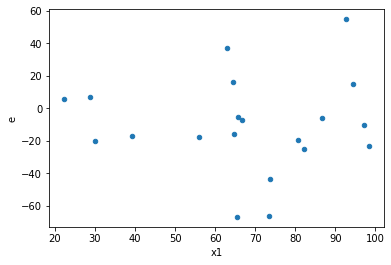

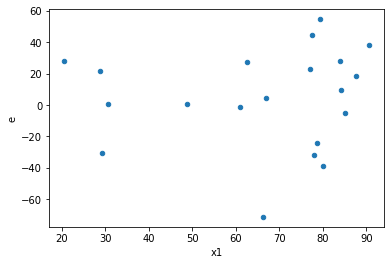

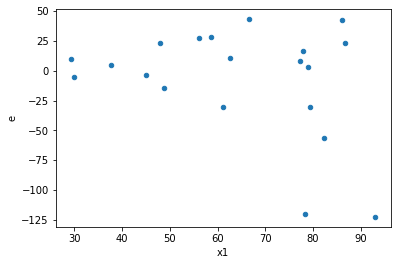

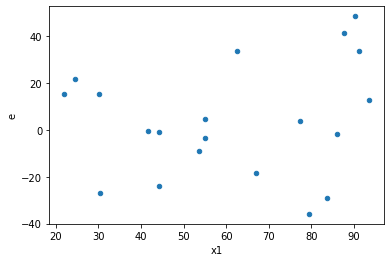

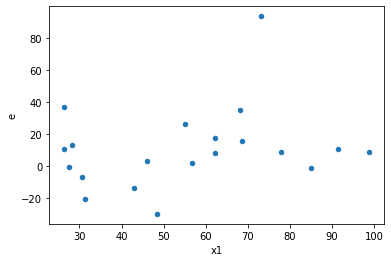

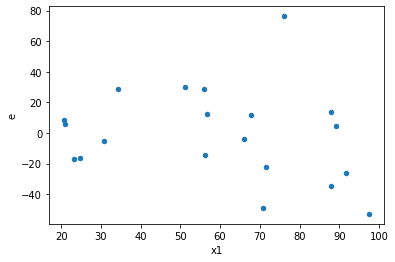

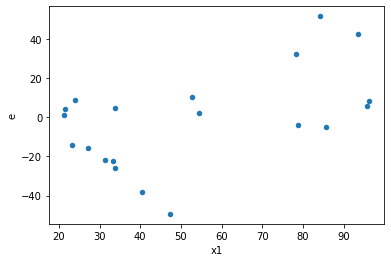

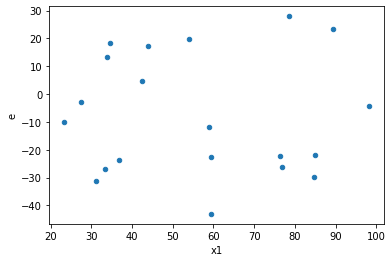

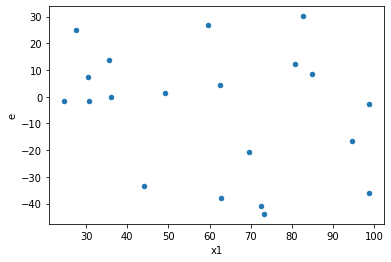

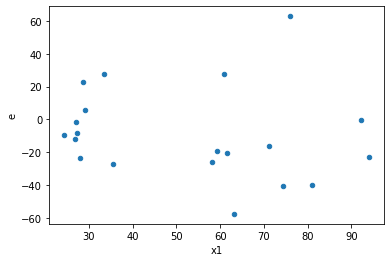

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,14.0,4.0,4346.91175863669,2768.964684929711,310.49369704547786,692.2411712324277,2.229485422150246,0.4563116477722404,0.7718441761138798,0.2281558238861202,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,2144.771552507567,9003.105747560854,238.30795027861853,1000.3450830623171,4.197699161495705,0.04393978086880801,0.978030109565596,0.021969890434404005,Reject005=0 : Heteroscedasticity
7.0,7.0,11.0,2223.425291738674,13857.69631152393,317.63218453409627,1259.7905737749027,3.9661930846924935,0.04177842280209321,0.9791107885989534,0.020889211401046603,Reject005=0 : Heteroscedasticity
8.0,8.0,10.0,1122.069455963683,10497.168802440337,140.25868199546036,1049.7168802440337,7.48414904025698,0.004601411134762756,0.9976992944326186,0.002300705567381378,Reject005=0 : Heteroscedasticity
12.0,9.0,9.0,3230.7508539620662,28762.931509655315,358.97231710689624,3195.8812788505907,8.902862773952867,0.003240252165588764,0.9983798739172056,0.001620126082794382,Reject005=0 : Heteroscedasticity
14.0,8.0,10.0,2022.8889194546064,6877.406355967107,252.8611149318258,687.7406355967107,2.719835494603958,0.14066057071916527,0.9296697146404174,0.07033028535958263,Reject005=1 : Homoscedasticity
16.0,12.0,6.0,4207.7294419690725,3182.195105913179,350.6441201640894,530.3658509855298,1.5125473963097882,0.63515465812751,0.682422670936245,0.317577329063755,Reject005=1 : Homoscedasticity
17.0,12.0,6.0,5252.2057816621755,3340.4985378844763,437.6838151385146,556.7497563140794,1.272036426884745,0.8055612147921123,0.5972193926039439,0.40278060739605615,Reject005=1 : Homoscedasticity
19.0,8.0,10.0,2841.517003422289,11408.76253480638,355.1896254277861,1140.8762534806378,3.212020205000583,0.08774802824817551,0.9561259858759122,0.04387401412408776,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,14.0,4196.706640341849,9488.031690060576,1049.1766600854623,677.7165492900411,0.6459508441932331,0.722348773346536,Reject005=1 : Homoscedasticity
1.0,10.0,8.0,5261.241571246419,3160.0202849938355,526.1241571246419,395.00253562422944,0.7507781771188489,0.658301196434063,Reject005=1 : Homoscedasticity
2.0,14.0,4.0,4346.91175863669,2768.964684929711,310.49369704547786,692.2411712324277,2.229485422150246,0.4563116477722404,Reject005=1 : Homoscedasticity
3.0,8.0,10.0,24466.898454653692,3743.212507944816,3058.3623068317115,374.3212507944816,0.12239270996713827,0.006596303342906268,Reject005=0 : Heteroscedasticity
4.0,11.0,7.0,5350.784089981652,968.5646915385103,486.43491727105925,138.36638450550146,0.28444994302988874,0.06214095609542727,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,2144.771552507567,9003.105747560854,238.30795027861853,1000.3450830623171,4.197699161495705,0.04393978086880801,Reject005=0 : Heteroscedasticity
6.0,12.0,6.0,7722.203754293585,508.68648327397545,643.5169795244655,84.78108054566258,0.13174645462861378,0.003109872132912764,Reject005=0 : Heteroscedasticity
7.0,7.0,11.0,2223.425291738674,13857.69631152393,317.63218453409627,1259.7905737749027,3.9661930846924935,0.04177842280209321,Reject005=0 : Heteroscedasticity
8.0,8.0,10.0,1122.069455963683,10497.168802440337,140.25868199546036,1049.7168802440337,7.48414904025698,0.004601411134762756,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      653
Reject005=0 : Heteroscedasticity    347
Name: Result_test, dtype: int64